# A ML based Quantitative Credit Scoring Model

Team: Hongfei Ge, Sijie Hou, Shuwen Pang

In [1]:
# import modules here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import t
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score,GridSearchCV
from myLogisticRegression import LogisticRegression,stepwiseFwdLR

## 1. Variable Mapping 

In [2]:
data = pd.read_table("./data/Credit_data_RSM6305.txt",sep=' ')
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21
1,A11,6.0,A34,A43,1169.0,A65,A75,4.0,A93,A101,...,A121,67.0,A143,A152,2.0,A173,1.0,A192,A201,1
2,A12,48.0,A32,A43,5951.0,A61,A73,2.0,A92,A101,...,A121,22.0,A143,A152,1.0,A173,1.0,NaN,A201,2
3,A14,12.0,A34,A46,2096.0,NaN,A74,2.0,A93,A101,...,A121,49.0,A143,NaN,1.0,A172,2.0,A191,A201,1
4,A11,42.0,A32,A42,7882.0,A61,A74,2.0,A93,A103,...,A122,45.0,A143,A153,1.0,A173,2.0,A191,A201,1
5,A11,24.0,A33,A40,4870.0,A61,A73,3.0,NaN,A101,...,A124,53.0,A143,A153,2.0,A173,NaN,A191,A201,2


<AxesSubplot:>

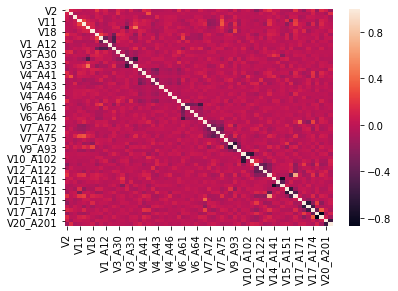

In [3]:
sns.heatmap(pd.get_dummies(data).corr())

In [16]:
pd.get_dummies(data)

,V2,V5,V8,V11,V13,V16,V18,V21,V1_A11,V1_A12,...,V15_A152,V15_A153,V17_A171,V17_A172,V17_A173,V17_A174,V19_A191,V19_A192,V20_A201,V20_A202
1,6.0,1169.0,4.0,4.0,67.0,2.0,1.0,1,1,0,...,1,0,0,0,1,0,0,1,1,0
2,48.0,5951.0,2.0,2.0,22.0,1.0,1.0,2,0,1,...,1,0,0,0,1,0,0,0,1,0
3,12.0,2096.0,2.0,3.0,49.0,1.0,2.0,1,0,0,...,0,0,0,1,0,0,1,0,1,0
4,42.0,7882.0,2.0,4.0,45.0,1.0,2.0,1,1,0,...,0,1,0,0,1,0,1,0,1,0
5,24.0,4870.0,3.0,4.0,53.0,2.0,NaN,2,1,0,...,0,1,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,12.0,1736.0,3.0,NaN,31.0,1.0,1.0,1,0,0,...,1,0,0,1,0,0,1,0,1,0
997,NaN,3857.0,4.0,4.0,NaN,1.0,1.0,1,1,0,...,1,0,0,0,0,1,0,1,1,0
998,12.0,804.0,4.0,4.0,38.0,1.0,1.0,1,0,0,...,1,0,0,0,1,0,1,0,1,0
999,45.0,1845.0,4.0,4.0,23.0,1.0,1.0,2,1,0,...,0,1,0,0,1,0,0,1,1,0


In [13]:
data['V5'].value_counts()

1478.0    3
1262.0    3
1258.0    3
1393.0    3
1409.0    2
         ..
1882.0    1
1076.0    1
806.0     1
931.0     1
2096.0    1
Name: V5, Length: 899, dtype: int64

## 2. Exploratory Data Analysis &Wranging

In /home/clarence/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/clarence/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/clarence/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/clarence/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/clarence/anaconda3/lib/python3.7/site-packa

array([[<AxesSubplot:title={'center':'V2'}>,
        <AxesSubplot:title={'center':'V5'}>,
        <AxesSubplot:title={'center':'V8'}>],
       [<AxesSubplot:title={'center':'V11'}>,
        <AxesSubplot:title={'center':'V13'}>,
        <AxesSubplot:title={'center':'V16'}>],
       [<AxesSubplot:title={'center':'V18'}>,
        <AxesSubplot:title={'center':'V21'}>, <AxesSubplot:>]],
      dtype=object)

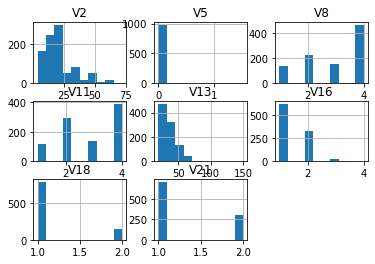

In [12]:
data.hist()

## 3. Variable Selection and Transformation

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1000
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      969 non-null    object 
 1   V2      929 non-null    float64
 2   V3      935 non-null    object 
 3   V4      951 non-null    object 
 4   V5      973 non-null    float64
 5   V6      977 non-null    object 
 6   V7      958 non-null    object 
 7   V8      982 non-null    float64
 8   V9      926 non-null    object 
 9   V10     982 non-null    object 
 10  V11     940 non-null    float64
 11  V12     927 non-null    object 
 12  V13     978 non-null    float64
 13  V14     969 non-null    object 
 14  V15     938 non-null    object 
 15  V16     984 non-null    float64
 16  V17     994 non-null    object 
 17  V18     934 non-null    float64
 18  V19     934 non-null    object 
 19  V20     937 non-null    object 
 20  V21     1000 non-null   int64  
dtypes: float64(7), int64(1), object(13)
m

In [5]:
data['V21'].value_counts()

1    700
2    300
Name: V21, dtype: int64

In [6]:
data['target'] = data['V21'].apply(lambda x : 1 if x == 2 else 0)  # Convert to numeric
data = data.drop('V21',axis=1)

In [7]:
data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V12,V13,V14,V15,V16,V17,V18,V19,V20,target
1,A11,6.0,A34,A43,1169.0,A65,A75,4.0,A93,A101,...,A121,67.0,A143,A152,2.0,A173,1.0,A192,A201,0
2,A12,48.0,A32,A43,5951.0,A61,A73,2.0,A92,A101,...,A121,22.0,A143,A152,1.0,A173,1.0,NaN,A201,1
3,A14,12.0,A34,A46,2096.0,NaN,A74,2.0,A93,A101,...,A121,49.0,A143,NaN,1.0,A172,2.0,A191,A201,0
4,A11,42.0,A32,A42,7882.0,A61,A74,2.0,A93,A103,...,A122,45.0,A143,A153,1.0,A173,2.0,A191,A201,0
5,A11,24.0,A33,A40,4870.0,A61,A73,3.0,NaN,A101,...,A124,53.0,A143,A153,2.0,A173,NaN,A191,A201,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,A14,12.0,A32,A42,1736.0,A61,A74,3.0,A92,A101,...,A121,31.0,A143,A152,1.0,A172,1.0,A191,A201,0
997,A11,NaN,A32,A41,3857.0,A61,A73,4.0,A91,A101,...,A122,NaN,A143,A152,1.0,A174,1.0,A192,A201,0
998,A14,12.0,A32,A43,804.0,A61,A75,4.0,A93,A101,...,A123,38.0,A143,A152,1.0,A173,1.0,A191,A201,0
999,A11,45.0,A32,A43,1845.0,A61,A73,4.0,A93,A101,...,A124,23.0,A143,A153,1.0,A173,1.0,A192,A201,1


### 3.1 Spliting training&testing set

Before moving to the estimation phase, it is important to not use the full data for estimation. Conduct a 70:30 cross validation, which means randomly sample 70% of the data as training set and keep the rest of 30% as test set. 

In [8]:
from sklearn.model_selection import train_test_split

X = data[data.columns.difference(['target'])]
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [9]:
y_train.value_counts()

0    491
1    209
Name: target, dtype: int64

In [10]:
y_test.value_counts()

0    209
1     91
Name: target, dtype: int64

### 3.2 Binning and WOE calculation

Perform binning by grouping each of the variables (new features created from the previous section and the existing ones).

**Note:**
 1. We treated NaN as a attribute under each variable binning.
 2. Binning function and woe calculation are implemented under `./src/woe.py`
 

In [11]:
from src import woe
final_iv, IV = woe.data_vars(X_train,y_train)
final_iv

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
0,V1,A11,A11,181,87.0,0.480663,94.0,0.519337,0.416268,0.191446,0.776723,0.590031
1,V1,A12,A12,189,73.0,0.386243,116.0,0.613757,0.349282,0.236253,0.390979,0.590031
2,V1,A13,A13,41,8.0,0.195122,33.0,0.804878,0.038278,0.067210,-0.562956,0.590031
3,V1,A14,A14,267,33.0,0.123596,234.0,0.876404,0.157895,0.476578,-1.104704,0.590031
4,V1,NaN,NaN,22,8.0,0.363636,14.0,0.636364,0.038278,0.028513,0.294494,0.590031
...,...,...,...,...,...,...,...,...,...,...,...,...
87,V9,A91,A91,28,9.0,0.321429,19.0,0.678571,0.043062,0.038697,0.106895,0.045466
88,V9,A92,A92,208,76.0,0.365385,132.0,0.634615,0.363636,0.268839,0.302041,0.045466
89,V9,A93,A93,355,96.0,0.270423,259.0,0.729577,0.459330,0.527495,-0.138370,0.045466
90,V9,A94,A94,60,16.0,0.266667,44.0,0.733333,0.076555,0.089613,-0.157491,0.045466


In [12]:
# check the detials about woe here
??woe

In [13]:
IV.sort_values('IV')

,VAR_NAME,IV
9,V18,0.001337
2,V11,0.019443
18,V8,0.024541
15,V5,0.034552
10,V19,0.049794
1,V10,0.060289
7,V16,0.069226
5,V14,0.109044
12,V20,0.170341
8,V17,0.176723


### 3.3 WOE trasformation

Drop all the variables with an information value less than 0.02. This way, you can come up with a final set of variables for estimation. 

- Due to the IV values of `V18` and `V11` are lower lower than 0.02, we remove them from our dataset.

In [14]:
transform_vars_list = list((IV[IV.IV>=0.02]).VAR_NAME)
transform_prefix = 'woe_'

In [15]:
X_train_woe = woe.woe_transform(X_train,transform_vars_list,final_iv)

In [16]:
X_train_woe

,woe_V1,woe_V10,woe_V12,woe_V13,woe_V14,woe_V15,woe_V16,woe_V17,woe_V19,woe_V2,woe_V20,woe_V3,woe_V4,woe_V5,woe_V6,woe_V7,woe_V8,woe_V9
542,-1.104704,-0.00088,0.640536,-0.471560,-0.079747,0.713031,-0.174474,-0.033653,-0.143698,-0.110971,0.044891,-0.559583,0.485202,-0.097345,0.251114,-0.422184,0.087535,-0.138370
441,-1.104704,-0.00088,0.049737,-0.244502,-0.079747,-0.216332,0.082631,0.186938,-0.143698,-0.311397,0.044891,0.205813,0.485202,-0.097345,0.251114,-0.422184,0.087535,-0.271901
483,0.776723,-0.00088,0.071351,-0.471560,-0.079747,0.387087,-0.174474,-0.033653,0.302041,0.625268,0.044891,0.205813,-0.130744,0.071618,-1.193583,-0.422184,0.087535,0.302041
423,0.294494,-0.00088,-0.592809,-0.471560,-0.079747,-0.216332,-0.174474,-0.152129,0.055602,-0.311397,0.044891,-0.868657,0.485202,-0.097345,0.251114,-0.103730,-0.089796,-0.138370
779,-1.104704,-0.00088,0.049737,-0.244502,-0.079747,-0.216332,-0.174474,0.186938,-0.143698,0.625268,0.044891,-0.868657,-0.668317,0.071618,-1.193583,-0.422184,0.087535,-0.138370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,-1.104704,-0.00088,0.640536,-0.244502,0.377186,-0.090352,-0.174474,0.186938,-0.143698,-0.126719,0.044891,0.979273,0.485202,0.071618,0.251114,0.671788,-0.089796,-0.138370
271,-1.104704,-0.00088,0.071351,0.151207,-0.079747,-0.216332,0.082631,-0.033653,0.302041,-0.126719,-1.543785,0.205813,0.485202,0.071618,-0.445173,-0.103730,0.087535,-0.138370
861,-1.104704,-0.00088,-0.592809,0.431695,-0.079747,-0.216332,-0.174474,-0.033653,0.055602,-0.110971,0.044891,-0.559583,-0.668317,0.071618,-1.193583,-0.040407,0.087535,-0.138370
436,0.390979,-0.00088,-0.592809,0.431695,-0.079747,-0.216332,0.082631,-0.033653,-0.143698,-0.311397,0.044891,0.205813,-0.579651,-0.097345,-0.445173,-0.040407,-0.089796,-0.157491


### 3.4 Correlation matrix of the of all the variables

<AxesSubplot:>

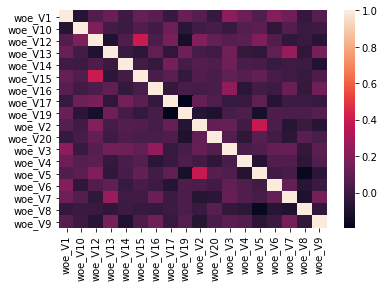

In [23]:
sns.heatmap(X_train_woe.corr())

From the correlation matrix, it shows that most of the variables we selected are independent. Only 2 pairs appears to be correlated:

1. `V2` (Duration) and `V5` (credit amount)

2. `V12` (qualitative) and `V15` (housing)

## 4. Estimation

In [5]:
X_train_woe

,woe_V1,woe_V10,woe_V12,woe_V13,woe_V14,woe_V15,woe_V16,woe_V17,woe_V19,woe_V2,woe_V20,woe_V3,woe_V4,woe_V5,woe_V6,woe_V7,woe_V8,woe_V9
775,-1.104704,-0.00088,0.640536,-0.471560,-0.079747,0.713031,-0.174474,-0.033653,-0.143698,-0.110971,0.044891,-0.559583,0.485202,-0.097345,0.251114,-0.422184,0.087535,-0.138370
291,-1.104704,-0.00088,0.049737,-0.244502,-0.079747,-0.216332,0.082631,0.186938,-0.143698,-0.311397,0.044891,0.205813,0.485202,-0.097345,0.251114,-0.422184,0.087535,-0.271901
587,0.776723,-0.00088,0.071351,-0.471560,-0.079747,0.387087,-0.174474,-0.033653,0.302041,0.625268,0.044891,0.205813,-0.130744,0.071618,-1.193583,-0.422184,0.087535,0.302041
35,0.294494,-0.00088,-0.592809,-0.471560,-0.079747,-0.216332,-0.174474,-0.152129,0.055602,-0.311397,0.044891,-0.868657,0.485202,-0.097345,0.251114,-0.103730,-0.089796,-0.138370
322,-1.104704,-0.00088,0.049737,-0.244502,-0.079747,-0.216332,-0.174474,0.186938,-0.143698,0.625268,0.044891,-0.868657,-0.668317,0.071618,-1.193583,-0.422184,0.087535,-0.138370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
686,-1.104704,-0.00088,0.640536,-0.244502,0.377186,-0.090352,-0.174474,0.186938,-0.143698,-0.126719,0.044891,0.979273,0.485202,0.071618,0.251114,0.671788,-0.089796,-0.138370
855,-1.104704,-0.00088,0.071351,0.151207,-0.079747,-0.216332,0.082631,-0.033653,0.302041,-0.126719,-1.543785,0.205813,0.485202,0.071618,-0.445173,-0.103730,0.087535,-0.138370
664,-1.104704,-0.00088,-0.592809,0.431695,-0.079747,-0.216332,-0.174474,-0.033653,0.055602,-0.110971,0.044891,-0.559583,-0.668317,0.071618,-1.193583,-0.040407,0.087535,-0.138370
38,0.390979,-0.00088,-0.592809,0.431695,-0.079747,-0.216332,0.082631,-0.033653,-0.143698,-0.311397,0.044891,0.205813,-0.579651,-0.097345,-0.445173,-0.040407,-0.089796,-0.157491


In [6]:
y_train

775    0
291    0
587    0
35     0
322    0
      ..
686    1
855    0
664    0
38     1
866    0
Length: 700, dtype: int64

For logistic regression and stepwise logistic regression, the input data should be normalized before fed into the model.

In [7]:
scaler=StandardScaler()
scaler.fit(X_train_woe.values)
X_train_trans=scaler.transform(X_train_woe.values)

In [8]:
# some utilities for later analysis
def lr_statistics(lrModel,nSample,featureId=None):
    ts=np.sqrt(nSample)*lrModel.beta/np.sqrt(np.diag(np.linalg.inv(lrModel.hessian)))
    pv=[ 2*(1-t.cdf(abs(tv),nSample-1))  for tv in ts ]
    summary=pd.DataFrame({'coefficient':lrModel.beta,
                          't-statistics':ts,
                          'p-value':pv})
    if lrModel.fitIntercept:
        if not featureId:
            summary.index=['beta_'+str(i) for i in range(len(lrModel.beta))]
        else:
            summary.index=['beta_0']+['beta_'+str(i) for i in featureId]
    else:
        if not featureId:
            summary.index=['beta_'+str(i+1) for i in range(len(lrModel.beta))]
        else:
            summary.index=['beta_'+str(i) for i in featureId]
    
    summary['significance_0.05']=summary['p-value']<0.05
    
    return summary

def roc_analysis(trueLabel,proba):
    auc=roc_auc_score(trueLabel,proba)
    fpr,tpr,threshold=roc_curve(trueLabel,proba)
    bestCutOff=threshold[np.argmax(np.abs(tpr-fpr))]
    
    print('AUC:',auc)
    print('best cut off value:',bestCutOff)
    plt.plot(fpr,tpr)
    return bestCutOff

### 4.1 Logistic Regression

Logistic regression maximizes the log-likelihood of samples, for binary classification, it's equavelent to minimize cross entropy loss. For better convergence, we add an L2 regularization term to cross entropy loss as the total loss.

$$Loss=-\mathop{\Sigma}\limits_{i=1}^{N} y_i log p_i + (1-y_i) log(1-p_i) + \dfrac{C}{2}||\beta||_2^2$$

In [9]:
lr=LogisticRegression()
lr.train(X_train_trans,y_train.values)

Let's print out the loss curve in training phase.

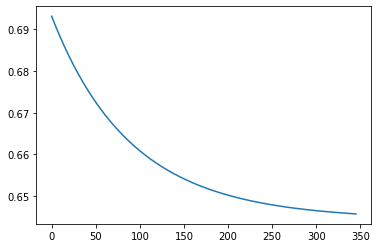

In [10]:
lr.print_loss_curve()

By printing out ROC curve, we see the AUC score is 0.8231, which means the model is quite good.

We pick the best cut off value that maximize the difference between true positive rate and false positive rate.

$$Best\,cut\,off=\mathop{\arg\max}\limits_{\theta}|TPR_{\theta}-FPR_{\theta}|$$

AUC: 0.8230736998021809
best cut off value: 0.4760372643894368


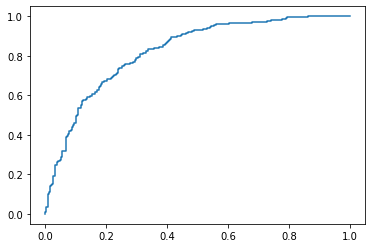

In [11]:
lr_proba_train=lr.predict(X_train_trans)
lr_cutoff=roc_analysis(y_train.values,lr_proba_train)

For the linear part of logistic regression, we can also test the significance of each coefficient. Variables used here are those with IV>0.02 and features are normalized WOE. As the table shows, all the variables are significant except WOE of V5. Note beta_0 always refers to the intercept term. We find all the variables have positive influences to default probability. This is reasonable because the positive target (y=1) in our analysis is the default case. So a higher WOE score means a higher chance of default.

In [12]:
lr_statistics(lr,X_train_trans.shape[0],featureName)

,coefficient,t-statistics,p-value,significance_0.05
beta_0,-0.148452,-51.636718,0.000000e+00,True
beta_woe_V1,0.089018,28.791054,0.000000e+00,True
beta_woe_V10,0.013998,4.696597,3.185170e-06,True
beta_woe_V12,0.039913,11.966062,0.000000e+00,True
beta_woe_V13,0.041308,13.387287,0.000000e+00,True
beta_woe_V14,0.017881,6.024746,2.738685e-09,True
beta_woe_V15,0.034968,11.057995,0.000000e+00,True
beta_woe_V16,0.009096,3.013633,2.674732e-03,True
beta_woe_V17,0.026471,8.692389,0.000000e+00,True
beta_woe_V19,0.015594,5.169406,3.068810e-07,True


### 4.2 Stepwise Forward Logistic Regression

In stepwise forward logistic regression, we start from using only an intercept term and add one variable each time. The added one provides the largest reduce in AIC among all candidates. In the stepwise forward process, we also test the statistic significance of the chosen variable that only if it's significant with a confidence of 95% then it will actually be added, otherwise the process ends.

In [13]:
sFwdLR=stepwiseFwdLR()
sFwdLR_fid=sFwdLR.train(X_train_trans,y_train.values)

Let's print out the loss curve. There's no much difference between naive one and stepwise one.

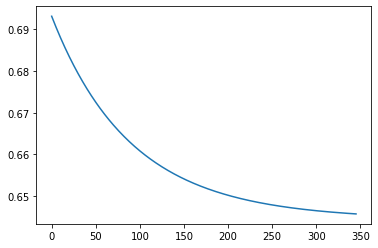

In [14]:
sFwdLR.print_loss_curve()

The ROC curve shows an AUC of 0.8232, slightly better than naive one. The best cut off value follows the same rule as mentioned above.

AUC: 0.8231516580750154
best cut off value: 0.4692011123343482


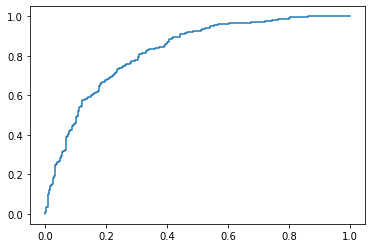

In [18]:
sFwdLR_proba_train=sFwdLR.predict(X_train_trans[:,np.array(sFwdLR_fid[1:])-1])
sFwdLR_cutoff=roc_analysis(y_train.values,sFwdLR_proba_train)

We also show the statistic significance of all variables finally chosen by stepwise forward process. Compared to previous naive logistic model, the stepwise one eventually exclude one feature that is WOE_V5, which is statistically insignificant in naive logistic model. All the coefficients are significant and are almost as same as in naive model.

In [48]:
sFwdLR_featureIn=['0']+[ featureName[i-1] for i in sFwdLR_fid[1:] ]
lr_statistics(sFwdLR,X_train_trans.shape[0],sFwdLR_featureIn)

,coefficient,t-statistics,p-value,significance_0.05
beta_0,-0.148451,-51.636604,0.000000e+00,True
beta_woe_V1,0.089133,28.871158,0.000000e+00,True
beta_woe_V3,0.069680,22.324531,0.000000e+00,True
beta_woe_V4,0.065849,22.290282,0.000000e+00,True
beta_woe_V2,0.046187,15.430377,0.000000e+00,True
beta_woe_V6,0.045550,15.215315,0.000000e+00,True
beta_woe_V12,0.040185,12.086813,0.000000e+00,True
beta_woe_V13,0.041152,13.371597,0.000000e+00,True
beta_woe_V15,0.035092,11.108327,0.000000e+00,True
beta_woe_V7,0.031284,10.157700,0.000000e+00,True


### 4.3 Decision Tree

By cost complexity pruning, a post pruning method, we obtain a subtree series and corresponding alphas which are the penalty levels of complexity. We utilize 5 fold cross validation to pick the best alpha which turn out to be 0.0085 under a evaluation metrics of accuracy.

In [50]:
clf=DecisionTreeClassifier(random_state=0)
path=clf.cost_complexity_pruning_path(X_train_woe.values,y_train.values)
cv_score=[]

for alpha in path.ccp_alphas:
    clf=DecisionTreeClassifier(random_state=0,ccp_alpha=alpha)
    score=cross_val_score(clf,X_train_woe.values,y_train.values,cv=5,scoring='accuracy')
    cv_score.append(score.tolist())

best_alpha=path.ccp_alphas[np.mean(cv_score,axis=1).argmax()]

dt=DecisionTreeClassifier(random_state=0,ccp_alpha=best_alpha)
dt.fit(X_train_woe.values,y_train.values)

DecisionTreeClassifier(ccp_alpha=0.008518991882923724, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=0, splitter='best')

Also print out the ROC and AUC to see how the tree performs. The AUC is 0.7364.

AUC: 0.7363889728023075
best cut off value: 0.3269230769230769


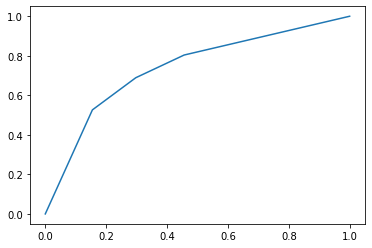

In [51]:
_=roc_analysis(y_train.values,dt.predict_proba(X_train_woe.values)[:,1])

### 4.4 Random Forest

Random Forest is a boostrapped aggregation ensemble of decision tree. In our analysis, we do grid search and cross validation to find best hyperparameters that are number of trees and number of features considered for each tree. The grid search takes around 20 minutes to run. Feel free to use pickle to directly get the result.

In [28]:
paramGrid={'n_estimators':np.arange(200,2100,100).tolist(),
           'max_features':np.arange(2,11,1).tolist()}

rf=RandomForestClassifier(random_state=0)
gs=GridSearchCV(rf,param_grid=paramGrid,cv=5,scoring='accuracy')
gs.fit(X_train_woe.values,y_train.values)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                   

In [28]:
# uncomment this cell to retrieve grid search result directly
#import pickle
#with open('gs.pickle','rb') as f:
#    gs=pickle.load(f)

The cross validation results are stored in gs.cv_results_. Here we only present results with the best hyperparameters combinations. The best combination is not unique, with a mean test score(mean accuracy) of 0.7486 for all. We pick the one that is simplest, i.e 700 trees and 2 features considered for each tree.

In [29]:
gsResult=pd.DataFrame(gs.cv_results_)
gsResult[gsResult['rank_test_score']==1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
5,0.919162,0.009972,0.062744,0.000445,2,700,"{'max_features': 2, 'n_estimators': 700}",0.742857,0.714286,0.735714,0.800000,0.750000,0.748571,0.028356,1
13,1.977462,0.028873,0.135395,0.002924,2,1500,"{'max_features': 2, 'n_estimators': 1500}",0.750000,0.714286,0.728571,0.785714,0.764286,0.748571,0.025314,1
15,2.348709,0.052013,0.165155,0.017974,2,1700,"{'max_features': 2, 'n_estimators': 1700}",0.750000,0.714286,0.728571,0.792857,0.757143,0.748571,0.026878,1


In [30]:
bestHyperParam=gs.cv_results_['params'][gs.cv_results_['rank_test_score'].argmin()]
rf=RandomForestClassifier(**bestHyperParam,random_state=0)
rf.fit(X_train_woe.values,y_train.values)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

Let's print out ROC and AUC. The AUC is 1 meaning the model is perfect on training set.

AUC: 1.0
best cut off value: 0.6514285714285715


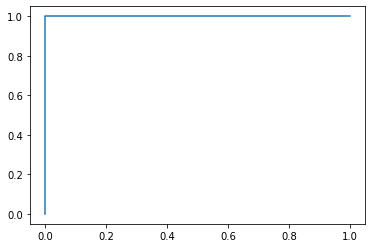

In [31]:
_=roc_analysis(y_train.values,rf.predict_proba(X_train_woe.values)[:,1])

We can see importance of each feature. The top 5 features are WOE_V1, WOE_V4, WOE_V3, WOE_V7, WOE_V2.

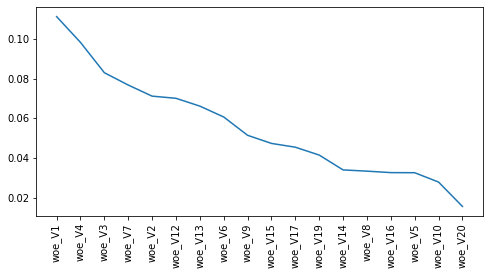

In [33]:
featureImp=list(zip(featureName,rf.feature_importances_))
featureImp=np.array(sorted(featureImp,key=lambda x:x[1],reverse=True))
plt.figure(figsize=(8,5))
plt.plot(featureImp[:,1].astype(float))
plt.xticks(np.arange(len(featureImp)),featureImp[:,0],rotation=90)
plt.subplots_adjust(bottom=0.3)

## 5. Performance Validation

In [20]:
# out of sample inputs woe transform
X_test_woe = woe.woe_transform(X_test,transform_vars_list,final_iv)

In [34]:
X_test_woe

,woe_V1,woe_V10,woe_V12,woe_V13,woe_V14,woe_V15,woe_V16,woe_V17,woe_V19,woe_V2,woe_V20,woe_V3,woe_V4,woe_V5,woe_V6,woe_V7,woe_V8,woe_V9
4,0.776723,-0.00088,-0.592809,0.431695,-0.079747,-0.216332,0.082631,-0.033653,0.055602,-0.126719,0.044891,-0.559583,-0.579651,0.071618,0.251114,-0.040407,-0.089796,0.302041
5,0.776723,-0.00088,0.049737,-0.244502,-0.079747,-0.216332,0.082631,-0.152129,-0.143698,-0.126719,0.044891,0.205813,0.485202,0.071618,0.225501,-0.040407,-0.089796,-0.138370
12,0.776723,-0.00088,0.049737,0.151207,0.377186,-0.216332,0.082631,-0.033653,0.055602,-0.110971,0.044891,0.979273,0.485202,-0.097345,0.225501,-0.103730,-0.089796,-0.138370
17,-0.562956,-0.00088,-0.592809,0.431695,-0.079747,0.387087,0.082631,-0.033653,0.055602,-0.311397,0.044891,0.205813,-0.579651,-0.097345,0.251114,-0.040407,-0.089796,-0.157491
18,-1.104704,-0.00088,0.049737,-0.244502,-0.079747,-0.090352,-0.174474,0.186938,-0.143698,0.625268,0.044891,-0.868657,-0.668317,0.071618,0.251114,-0.103730,-0.089796,-0.138370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,-1.104704,-0.00088,0.049737,0.431695,-0.079747,-0.216332,-0.174474,-0.033653,-0.143698,0.625268,0.044891,0.006812,0.394578,0.071618,0.251114,-0.040407,-0.089796,-0.271901
981,0.390979,-0.00088,0.640536,0.151207,0.218121,-0.216332,-0.174474,0.186938,0.055602,0.625268,0.044891,0.006812,-0.579651,0.402125,0.225501,0.338644,0.087535,-0.138370
986,-1.104704,-0.00088,0.049737,0.431695,-0.079747,-0.216332,0.082631,-0.033653,0.055602,-0.311397,0.044891,0.205813,-0.130744,-0.097345,0.251114,-0.422184,-0.089796,-0.138370
987,0.390979,-0.00088,0.049737,-0.244502,-0.079747,0.387087,0.082631,0.186938,-0.143698,0.625268,0.044891,0.205813,-0.668317,0.071618,0.251114,-0.040407,-0.089796,-0.138370


In [35]:
X_test_trans=scaler.transform(X_test_woe.values)

### 5.1 predict out-of-sample default probability for each method

Let's do out-of-sample prediction. For logistic model and stepwise logistic model, we use the best cut off value derived in Section IV for final label prediction. For tree model, we use the built-in functionality that takes 0.5 as the threshold, this is same as majority vote for random forest.

In [55]:
lr_proba_test=lr.predict(X_test_trans)
sFwdLR_proba_test=sFwdLR.predict(X_test_trans[:,np.array(sFwdLR_fid[1:])-1])
dt_proba_test=dt.predict_proba(X_test_woe.values)
rf_proba_test=rf.predict_proba(X_test_woe.values)
result=pd.DataFrame({'lr_proba':lr_proba_test,
                     'sFwdLR_proba':sFwdLR_proba_test,
                     'dt_proba':dt_proba_test[:,1],
                     'rf_proba':rf_proba_test[:,1]})
result['lr_pred']=(result['lr_proba']>lr_cutoff).astype(int)
result['sFwdLR_pred']=(result['sFwdLR_proba']>sFwdLR_cutoff).astype(int)
result['dt_pred']=dt.predict(X_test_woe.values)
result['rf_pred']=rf.predict(X_test_woe.values)
result['true_label']=y_test.values
result.index=X_test_woe.index

In [56]:
result

,lr_proba,sFwdLR_proba,dt_proba,rf_proba,lr_pred,sFwdLR_pred,dt_pred,rf_pred,true_label
4,0.459372,0.458679,0.235294,0.245714,0,0,0,0,1
5,0.489142,0.488608,0.591398,0.530000,1,1,1,1,0
12,0.542410,0.543161,0.591398,0.590000,1,1,1,1,0
17,0.440522,0.441120,0.133117,0.212857,0,0,0,0,0
18,0.405919,0.405981,0.133117,0.081429,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
976,0.469822,0.469673,0.133117,0.214286,0,1,0,0,0
981,0.533825,0.531130,0.326923,0.488571,1,1,0,0,1
986,0.431607,0.432151,0.133117,0.225714,0,0,0,0,0
987,0.493628,0.493802,0.591398,0.518571,1,1,1,1,0


### 5.2 Brier score 
- https://en.wikipedia.org/wiki/Brier_score 

In [38]:
def BrierScore(proba,true):
    return ((proba-true)**2).mean()

The Brier score shows tree models are better than logistic models.

In [58]:
print('Logistic Regression Brier Score:',BrierScore(lr_proba_test,y_test.values))
print('Stepwise Forward Logistic Regression Brier Score:',BrierScore(sFwdLR_proba_test,y_test.values))
print('Decision Tree Brier Score:',BrierScore(dt_proba_test[:,1],y_test.values))
print('Random Forest Brier Score:',BrierScore(rf_proba_test[:,1],y_test.values))

Logistic Regression Brier Score: 0.2188521339564241
Stepwise Forward Logistic Regression Brier Score: 0.21883339669398263
Decision Tree Brier Score: 0.18547159482661701
Random Forest Brier Score: 0.17122921768707486


### 5.3 Hosmer – Lemeshow Test

[A good primer](http://thestatsgeek.com/2014/02/16/the-hosmer-lemeshow-goodness-of-fit-test-for-logistic-regression/)

In [40]:
def HLtest(proba,true,g=10):
    from sklearn.model_selection import KFold
    from scipy.stats import chi2
    kf=KFold(n_splits=g)
    groupProba=[]
    groupTrue=[]
    for _,outIndex in kf.split(proba):
        groupProba.append(proba[outIndex])
        groupTrue.append(true[outIndex])
    
    groupProba=np.array([ proba.mean() for proba in groupProba ])
    groupTrue=np.array([ [true.sum(),len(true)-true.sum(),len(true)] for true in groupTrue ])
    expPos=groupProba*groupTrue[:,2]
    expNeg=(1-groupProba)*groupTrue[:,2]
    HL=((groupTrue[:,0]-expPos)**2/expPos + (groupTrue[:,1]-expNeg)**2/expNeg).sum()
    p=1-chi2.cdf(HL,g-2)
    
    return HL,p

The HL test implies that only tree models fit well.

In [59]:
for method,proba in zip(['Logistic Regression','Stepwise Forward Logistic Regression','Decision Tree','Random Forest'],
                        [lr_proba_test,sFwdLR_proba_test,dt_proba_test[:,1],rf_proba_test[:,1]]):
    HL,p=HLtest(proba,y_test.values)
    print(method+':')
    print('HL statistics='+str(HL),'p value='+str(p),'significance(0.05):'+str(p<0.05))
    print('-'*20)

Logistic Regression:
HL statistics=37.25097287908359 p value=1.034779140618447e-05 significance(0.05):True
--------------------
Stepwise Forward Logistic Regression:
HL statistics=37.24718369250093 p value=1.036442885826716e-05 significance(0.05):True
--------------------
Decision Tree:
HL statistics=7.737549267506993 p value=0.4595179984137574 significance(0.05):False
--------------------
Random Forest:
HL statistics=7.263079278450885 p value=0.5085327434935656 significance(0.05):False
--------------------


### 5.4 ROC curve, AUC

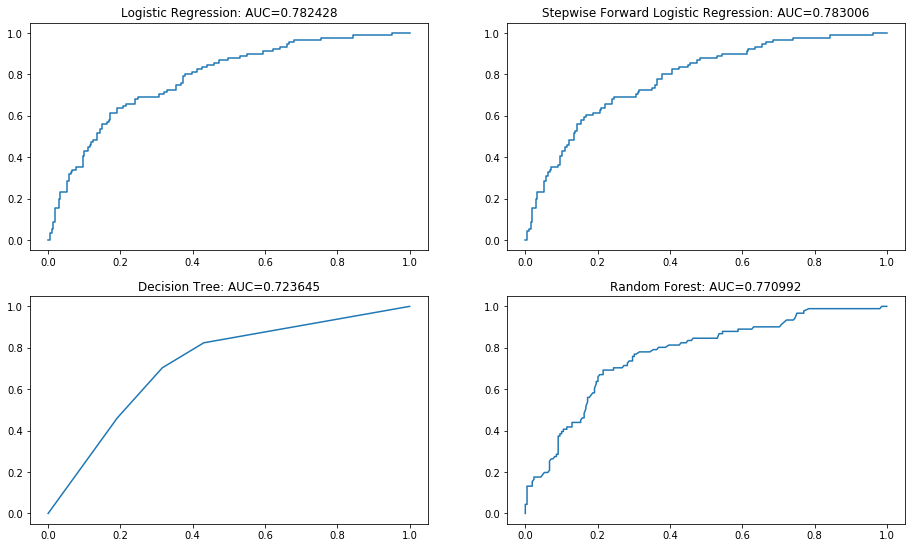

In [60]:
plt.figure(figsize=(18,12))

for i,item in enumerate(list(zip(['Logistic Regression','Stepwise Forward Logistic Regression',
                                  'Decision Tree','Random Forest'],
                                 [lr_proba_test,sFwdLR_proba_test,dt_proba_test[:,1],rf_proba_test[:,1]]))):
    plt.subplot(2,2,i+1)
    fpr,tpr,_=roc_curve(y_test.values,item[1])
    plt.plot(fpr,tpr)
    plt.title('{0}: AUC={1:.6f}'.format(item[0],roc_auc_score(y_test,item[1])))
    plt.subplots_adjust(bottom=0.3,right=0.8)


### 5.5 Final Recommendation

In conclusion, logistic model and stepwise logistic model have similar performane. So do tree models. The AUC for logistic model, stepwise logistic model and random forest are close. The accuracy for logistic model, stepwise logistic model and decision tree are close, outperformed by random forest. In terms of goodness of fit, only tree models are good. **Given that the default cases are of our interest and usually the default detection dataset are imbalanced, ROC and AUC are the evaluation metrics of priority.** So logistic regression and random forest are shortlisted as our candiate models. And the explainability of random forest is acceptable for us, so we recommend random forest.

In [61]:
print('Logistic Regression accuracy:',(result['lr_pred']==result['true_label']).mean())
print('Stepwise Forward Logistic Regression accuracy:',(result['sFwdLR_pred']==result['true_label']).mean())
print('Decision Tree accuracy:',(result['dt_pred']==result['true_label']).mean())
print('Random Forest accuracy:',(result['rf_pred']==result['true_label']).mean())

Logistic Regression accuracy: 0.71
Stepwise Forward Logistic Regression accuracy: 0.6933333333333334
Decision Tree accuracy: 0.7033333333333334
Random Forest accuracy: 0.7366666666666667
